In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [189]:
!pip install xgboost

     |████▊                           | 23.1 MB 91 kB/s eta 0:24:3545^C

ERROR: Operation cancelled by user


In [146]:
train=pd.read_csv('train.csv')
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

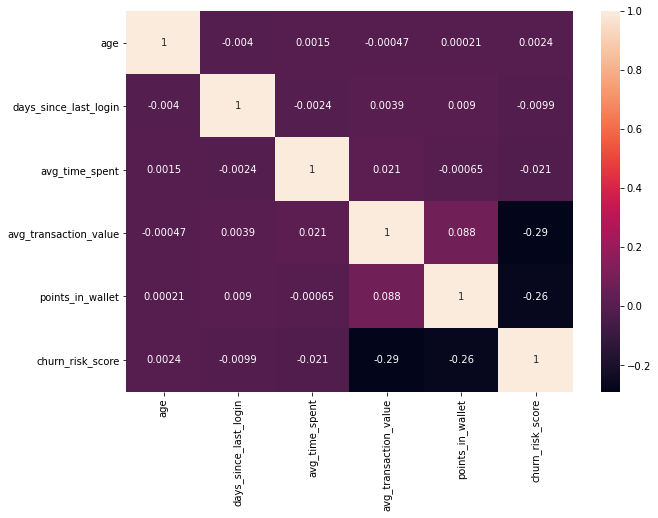

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(data=train.corr(),annot=True)
plt.show()

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_time_spent', ylabel='Density'>

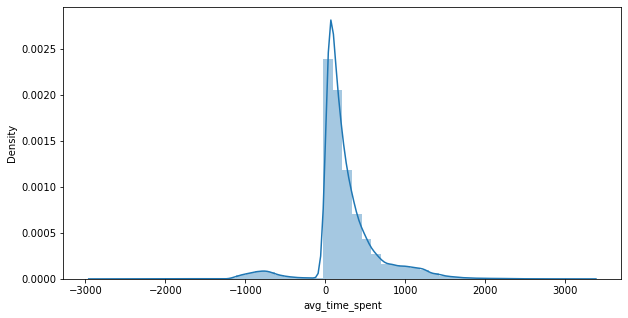

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(train.avg_time_spent)

In [7]:
train.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


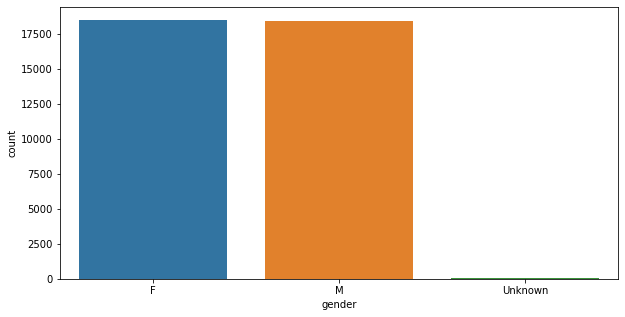

In [12]:
plt.figure(figsize=(10,5))
sns.countplot('gender',data=train)
plt.show()

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


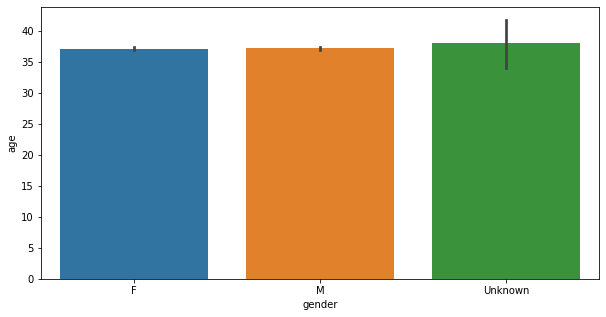

In [16]:
plt.figure(figsize=(10,5))
sns.barplot('gender','age',data=train)
plt.show()

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


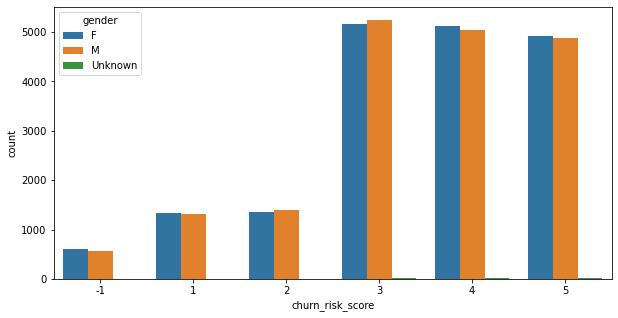

In [20]:
plt.figure(figsize=(10,5))
sns.countplot('churn_risk_score',data=train,hue='gender')
plt.show()

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


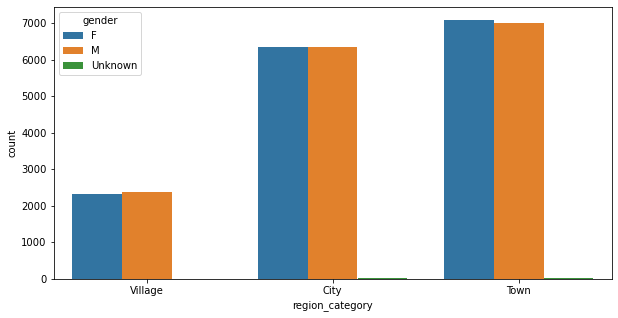

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(train.region_category,data=train,hue='gender')
plt.show()

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


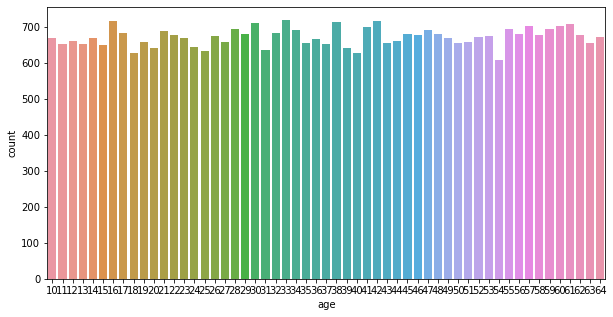

In [22]:
plt.figure(figsize=(10,5))
sns.countplot('age',data=train)
plt.show()

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


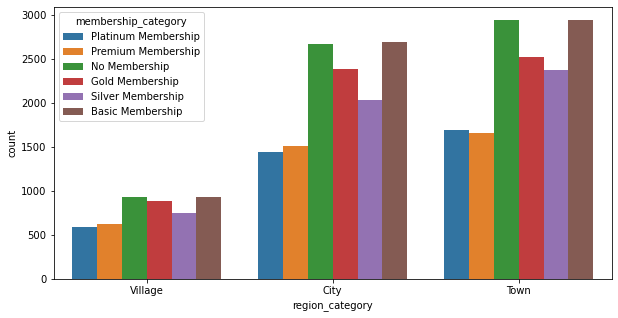

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(train.region_category,data=train,hue='membership_category')
plt.show()

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


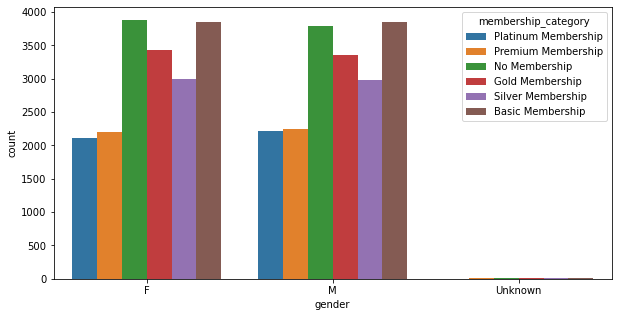

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(train.gender,data=train,hue='membership_category')
plt.show()

<Figure size 1080x1080 with 0 Axes>

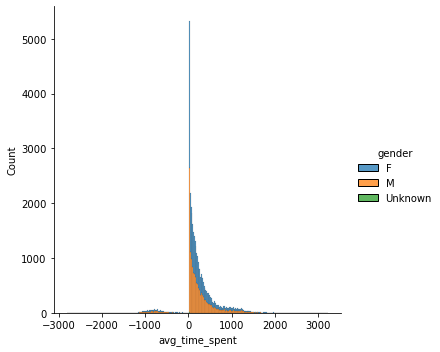

In [39]:
plt.figure(figsize=(15,15))
sns.displot(data=train, x="avg_time_spent", hue="gender", multiple="stack")
plt.show()

In [41]:
train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

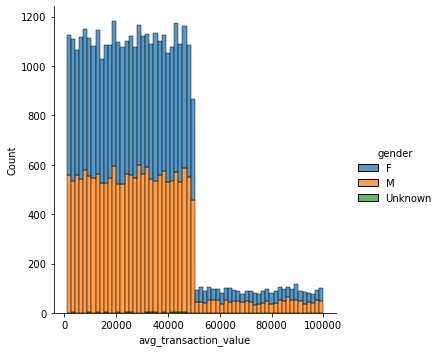

In [42]:
plt.figure(figsize=(15,15))
sns.displot(data=train, x="avg_transaction_value", hue="gender", multiple="stack")
plt.show()

<Figure size 1080x1080 with 0 Axes>

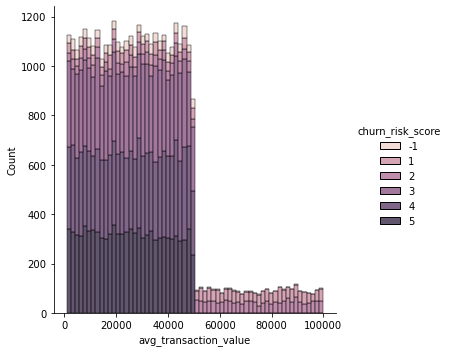

In [43]:
plt.figure(figsize=(15,15))
sns.displot(data=train, x="avg_transaction_value", hue="churn_risk_score", multiple="stack")
plt.show()

/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/omkar/anaconda3/lib/python3.7/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='avg_transaction_value'>

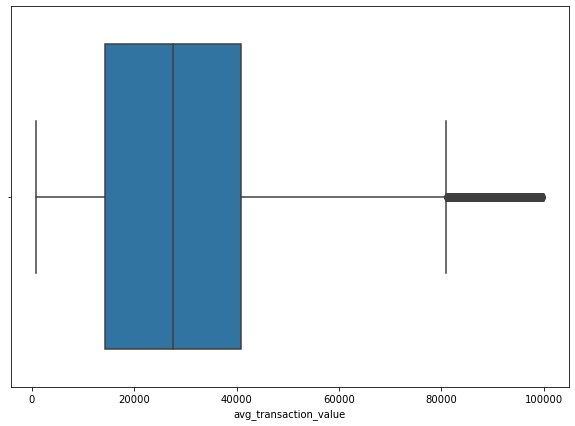

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(train.avg_transaction_value,orient='v')

In [95]:
train.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [147]:
train=train.dropna(axis=0,subset=['region_category'])

In [148]:
train.points_in_wallet=train.points_in_wallet.fillna(np.mean(train.points_in_wallet))

<IPython.core.display.Javascript object>

In [149]:
train.preferred_offer_types.value_counts()

Gift Vouchers/Coupons       10538
Credit/Debit Card Offers    10476
Without Offers              10311
Name: preferred_offer_types, dtype: int64

In [150]:
train=train.dropna(axis=0,subset=['preferred_offer_types'])

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31325 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   31325 non-null  object 
 1   Name                          31325 non-null  object 
 2   age                           31325 non-null  int64  
 3   gender                        31325 non-null  object 
 4   security_no                   31325 non-null  object 
 5   region_category               31325 non-null  object 
 6   membership_category           31325 non-null  object 
 7   joining_date                  31325 non-null  object 
 8   joined_through_referral       31325 non-null  object 
 9   referral_id                   31325 non-null  object 
 10  preferred_offer_types         31325 non-null  object 
 11  medium_of_operation           31325 non-null  object 
 12  internet_option               31325 non-null  object 
 13  l

In [152]:
train.feedback.unique()

array(['Products always in Stock', 'Quality Customer Care',
       'Poor Website', 'No reason specified', 'Poor Customer Service',
       'Poor Product Quality', 'Too many ads', 'User Friendly Website',
       'Reasonable Price'], dtype=object)

In [153]:
train=train.drop(['customer_id','Name','security_no','joining_date','referral_id','medium_of_operation','internet_option','last_visit_time'],axis=1)

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31325 entries, 0 to 36991
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           31325 non-null  int64  
 1   gender                        31325 non-null  object 
 2   region_category               31325 non-null  object 
 3   membership_category           31325 non-null  object 
 4   joined_through_referral       31325 non-null  object 
 5   preferred_offer_types         31325 non-null  object 
 6   days_since_last_login         31325 non-null  int64  
 7   avg_time_spent                31325 non-null  float64
 8   avg_transaction_value         31325 non-null  float64
 9   avg_frequency_login_days      31325 non-null  object 
 10  points_in_wallet              31325 non-null  float64
 11  used_special_discount         31325 non-null  object 
 12  offer_application_preference  31325 non-null  object 
 13  p

In [155]:
a=[]
for i in train.age:
    if i<35:
        a.append('adults')
        
    elif i>=35 and i<55:
        a.append('middle-aged adults')
    else:
        a.append('older adults')
        

In [118]:
set(['adults' if 10>i or i<35 else 'middle-aged adults' if i>=35 or i<55 else 'older adults' for i in train.age ])

{'adults', 'middle-aged adults'}

In [156]:
train.age.unique()

array([18, 32, 44, 37, 31, 13, 21, 45, 25, 60, 11, 34, 40, 16, 57, 39, 33,
       30, 19, 48, 43, 29, 10, 20, 61, 17, 12, 52, 26, 49, 24, 22, 36, 58,
       41, 50, 23, 38, 35, 28, 53, 55, 59, 47, 54, 62, 51, 56, 42, 27, 14,
       46, 15, 64, 63])

In [157]:
pd.Series(a).value_counts().values.sum()

31325

In [158]:
train['new_age']=a

In [159]:
train=train.drop(['age'],axis=1)

In [160]:
train

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,new_age
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,17,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2,adults
1,F,City,Premium Membership,?,Gift Vouchers/Coupons,16,306.340000,12838.38,10.0,687.916765,Yes,No,Yes,Solved,Quality Customer Care,1,adults
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,14,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5,middle-aged adults
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,11,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5,middle-aged adults
4,F,City,No Membership,No,Credit/Debit Card Offers,20,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,F,Village,Premium Membership,No,Gift Vouchers/Coupons,13,418.380000,56397.21,7.0,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,2,adults
36986,M,Town,Platinum Membership,Yes,Credit/Debit Card Offers,13,135.830000,8225.68,16.0,748.570000,Yes,No,No,Not Applicable,No reason specified,3,adults
36988,F,Town,Basic Membership,No,Without Offers,13,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5,adults
36990,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,15,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3,middle-aged adults


In [161]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [162]:
train.preferred_offer_types.unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers'], dtype=object)

In [163]:
le_gender=LabelEncoder()
le_new_age=LabelEncoder()
le_joined_through_referral=LabelEncoder()
le_used_special_discount=LabelEncoder()
le_offer_application_preference=LabelEncoder()
le_past_complaint=LabelEncoder()

In [168]:
le_region_cate=LabelEncoder()

In [164]:
le_membership_cat=LabelEncoder()
le_preferred_off_ty=LabelEncoder()
le_complain_stat=LabelEncoder()
le_feedback=LabelEncoder()

In [166]:
train.gender=le_gender.fit_transform(train.gender)
train.new_age=le_new_age.fit_transform(train.new_age)
train.joined_through_referral=le_joined_through_referral.fit_transform(train.joined_through_referral)
train.used_special_discount=le_used_special_discount.fit_transform(train.used_special_discount)
train.offer_application_preference=le_offer_application_preference.fit_transform(train.offer_application_preference)
train.past_complaint=le_past_complaint.fit_transform(train.past_complaint)
train.membership_category=le_membership_cat.fit_transform(train.membership_category)
train.preferred_offer_types=le_preferred_off_ty.fit_transform(train.preferred_offer_types)
train.complaint_status=le_complain_stat.fit_transform(train.complaint_status)
train.feedback=le_feedback.fit_transform(train.feedback)

In [169]:
train.region_category=le_region_cate.fit_transform(train.region_category)

In [170]:
train

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,new_age
0,0,2,3,1,1,17,300.630000,53005.25,17.0,781.750000,1,1,0,1,4,2,0
1,0,0,4,0,1,16,306.340000,12838.38,10.0,687.916765,1,0,1,2,5,1,0
2,0,1,2,2,1,14,516.160000,21027.00,22.0,500.690000,0,1,1,3,3,5,1
3,1,0,2,2,1,11,53.270000,25239.56,6.0,567.660000,0,1,1,4,3,5,1
4,0,0,2,1,0,20,113.130000,24483.66,16.0,663.060000,0,1,1,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,0,2,4,1,1,13,418.380000,56397.21,7.0,725.890000,1,1,1,4,4,2,0
36986,1,1,3,2,0,13,135.830000,8225.68,16.0,748.570000,1,0,0,1,0,3,0
36988,0,1,0,1,2,13,-638.123421,11069.71,28.0,527.990000,1,0,0,1,1,5,0
36990,1,2,3,1,1,15,482.610000,2378.86,20.0,197.264414,1,1,0,1,0,3,1


In [174]:
train=train.drop(['avg_frequency_login_days'],axis=1)

In [ ]:
x=train.drop(['churn_risk_score'],axis=1)
y=train.churn_risk_score

In [181]:
se=StandardScaler()

In [182]:
train_scaled=se.fit_transform(x)

In [183]:
train_scaled.shape

(31325, 15)

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [185]:
x_train.shape

(21927, 15)

In [186]:
y_train.shape

(21927,)

In [187]:
x_test.shape

(9398, 15)

In [188]:
y_test.shape

(9398,)

In [191]:
params={
    'learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth':[2,4,6,8,10]
}

In [193]:
model=GridSearchCV(GradientBoostingClassifier(n_estimators=100,random_state=42),params,n_jobs=1,cv=5)

In [195]:
model=GradientBoostingClassifier(n_estimators=100,max_depth=2)

In [196]:
model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=2)

In [197]:
model.score(x_test,y_test)

0.7600553309214727

In [199]:
y_pre=model.predict(x_test)

In [198]:
from sklearn.metrics import ConfusionMatrixDisplay

In [201]:
ConfusionMatrixDisplay(confusion_matrix=(y_test,y_pre))
plt.show()

In [202]:
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report

In [205]:
cm=confusion_matrix(y_test,y_pre)

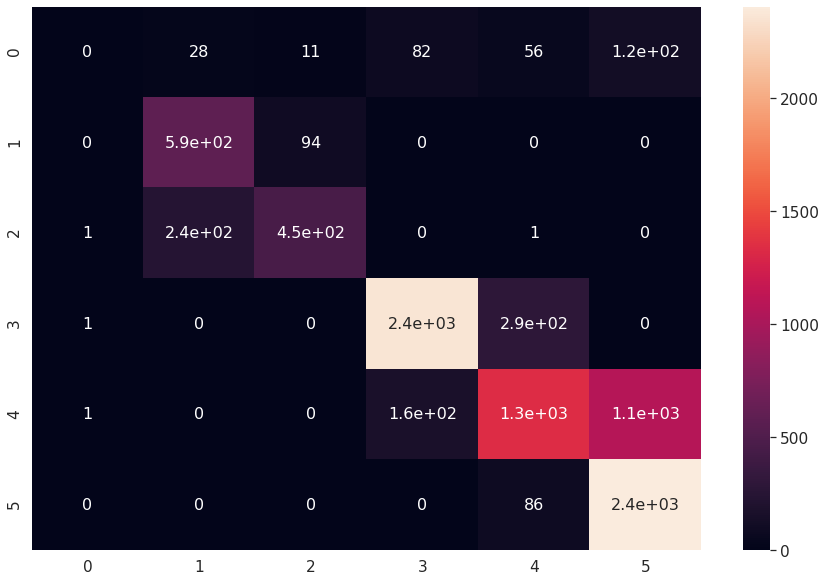

In [210]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()


In [211]:
cm

array([[   0,   28,   11,   82,   56,  120],
       [   0,  587,   94,    0,    0,    0],
       [   1,  242,  452,    0,    1,    0],
       [   1,    0,    0, 2363,  289,    0],
       [   1,    0,    0,  164, 1337, 1079],
       [   0,    0,    0,    0,   86, 2404]])

In [212]:
x_test

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,new_age
5584,0,2,0,1,0,22,186.68,45136.14,690.480000,1,0,1,3,7,2
35717,1,0,1,1,1,23,110.83,24556.14,450.645541,0,1,1,0,6,0
15547,1,0,2,1,0,10,291.12,35889.52,1185.296680,1,0,1,3,1,0
36983,1,1,0,2,2,9,49.33,45358.49,242.979625,1,0,0,1,1,1
27347,1,0,5,2,1,1,31.92,29130.95,796.850000,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,1,1,0,2,12,37.25,37632.04,959.553161,0,1,0,1,2,1
1395,0,0,2,2,0,8,1020.30,15925.56,509.690000,1,0,1,4,2,1
12504,1,0,2,2,1,1,903.45,35284.11,686.330000,0,1,0,1,0,2
12365,0,0,4,2,0,22,67.08,18155.23,717.180000,0,1,1,0,1,0


In [215]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       297
           1       0.68      0.86      0.76       681
           2       0.81      0.65      0.72       696
           3       0.91      0.89      0.90      2653
           4       0.76      0.52      0.61      2581
           5       0.67      0.97      0.79      2490

    accuracy                           0.76      9398
   macro avg       0.64      0.65      0.63      9398
weighted avg       0.75      0.76      0.74      9398



In [221]:
y_test[y_test==-1].value_counts()

-1    297
Name: churn_risk_score, dtype: int64

In [222]:
from sklearn import metrics

In [224]:
score = 100 * metrics.f1_score(y_test, y_pre, average="macro")

In [225]:
score

63.11249927979857

In [226]:
test=pd.read_csv('test.csv')

In [228]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19919 non-null  object 
 4   security_no                   19919 non-null  object 
 5   region_category               16971 non-null  object 
 6   membership_category           19919 non-null  object 
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       19919 non-null  object 
 9   referral_id                   19919 non-null  object 
 10  preferred_offer_types         19760 non-null  object 
 11  medium_of_operation           19919 non-null  object 
 12  internet_option               19919 non-null  object 
 13  l